In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [3]:
# we convert the data to 2D(numsample , image_dimension) 
#with our images present as 1D vectors
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

# now we normalize our data
X_train = X_train/255
X_test = X_test/255


The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [4]:
# org X_train is taking a lot of time so i am shortening the size
X_test_small,y_test_small = X_test[:1000],y_test[:1000]
X_train_small,y_train_small = X_train[:1000],y_train[:1000]

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_small, y_train_small)
y_pred = model.predict(X_test_small)

accuracy = np.sum(y_pred == y_test_small)/ len(y_test_small)
# i am printing less labels for better view
print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test_small[:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")


Predicted labels: [7 0 1 0 9 1 8 9 5 9 0 6 9 0 1 0 9 7 2 9 9 6 2 8 9 0 7 9 0 1 8 1 3 0 8 0 7
 1 3 1 1 9 8 2 3 8 1 6 9 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 62.50%


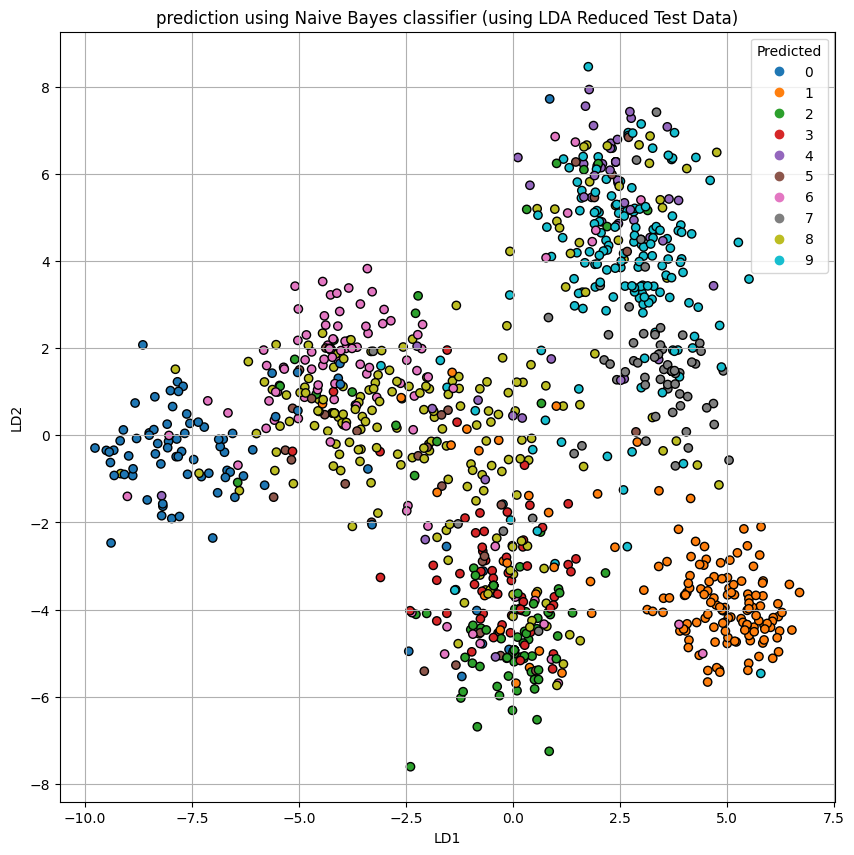

"\nWe observe that the accuracy of 62.50% for the Naive Bayes classifier \nis relatively low. This could be due to the assumption of feature \nindependence in Naive Bayes, which doesn't always hold true in practice. \nin our dataset with highly correlated features, such as digits that \nare visually similar or overlap, this assumption leads to poor performance.\nwe can see multiple overlaps here. also the performance is poor compared\nto KNN\n"

In [6]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
X_test was the data reduced to 2 dimension 
and y_test is the label to classify them
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using Naive Bayes classifier"
" (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
We observe that the accuracy of 62.50% for the Naive Bayes classifier 
is relatively low. This could be due to the assumption of feature 
independence in Naive Bayes, which doesn't always hold true in practice. 
in our dataset with highly correlated features, such as digits that 
are visually similar or overlap, this assumption leads to poor performance.
we can see multiple overlaps here. also the performance is poor compared
to KNN
'''
